[link text](https://)# Anomaly Detection Exercise: Credit Card Fraud

In this exercise, we will practice using the Local Outlier Factor and Isolation Forest methods to detect outliers in data sets. We will be looking at data from a selected subset of the data for the ["Credit Card Fraud Detection" Kaggle task](https://www.kaggle.com/mlg-ulb/creditcardfraud/data).

**Questions:**

**Question 1**:

  - Load the data in *creditcard_10k.csv.gz* into a Pandas dataframe *df* and examine the data with *df.describe()*.
  - Explain the mean and std values for the different features based on the meaning of the features (hint: see the Kaggle task description).

In [1]:
# your code here
import pandas as pd
df = pd.read_csv('creditcard_10k.csv.gz')

In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,...,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,...,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,...,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,...,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,...,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


V1,...V28 correspond to the features we got after PCA. As in PCA we standardize the features, we get features of mean around 0 and std around 1.

**Question 2**:

Split the data into `X` and `y` (`Class` column of the `df`).  

We will use **unsupervised** Anomaly Detection algorithms to find the outliers, and use the `Class` feature that tells whether the transaction is legitimate or fraudulent only as target labels for **metric** to check how well we were able to recognize the outliers.

In [3]:
# your code here
X = df.drop(columns = 'Class')
y = df.Class

**Question 3:**

We will be using and comparing behavior of 2 Anomaly Detection algorithms: Local Outlier Factor and Isolation Forest.   
   - Which one of them is based on distance?  
   - What preprocessing is required for distance-based algorithms?
   - Perform the preprocessing on all features

LOF is based on distance.
For distance-based algorithms, we need to scale all the features. As V1,...V28 are already scaled, we need to scale 'Time' and 'Amount'.

In [4]:
# your code here
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['Time','Amount']] = pd.DataFrame(sc.fit_transform(X[['Time','Amount']]),index = X.index)



**Question 4:** What percentage of transactions in the dataset are fraudulent using the `Class` feature?

In [5]:
# your code here
y.value_counts()/y.shape[0]*100

0    99.62
1     0.38
Name: Class, dtype: float64

99.62% of transactions are not fraudulent.
0.38% of transactions are fraudulent.

**Question 5:**

Use `sklearn.neighbors.LocalOutlierFactor` with default parameters to detect outliers in transaction details.  How many transactions and what percentage of transactions are called fraudulent (outliers) with default parameters of LocalOutlierFactor?

In [6]:
# your code here
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
fraud_trans_pred = lof.fit_predict(X)

In [7]:
import numpy as np
unique_val,occ_val = np.unique(fraud_trans_pred, return_counts = True)

In [8]:
unique_val,occ_val,occ_val/X.shape[0]*100

(array([-1,  1]), array([ 670, 9330]), array([ 6.7, 93.3]))

670 transactions (= 6.7%) are called fraudulent by the LOF method.

**Question 6:**

- Use `sklearn.metrics.confusion_matrix` and `sklearn.metrics.classification_report` to compare the results from unsupervised anomaly detection with LOF of previous question with the target labels.
- Is the output of LOF with default parameters better than randomly selecting same number of transactions as were chosen by LOF in previous question? Why or why not? (Hint: if we would randomly select X% of observations as outliers, what percentage of real outliers would be chosen?)

In [9]:
# your code here
fraud_trans_pred_copy = fraud_trans_pred.copy()
fraud_trans_pred_copy[fraud_trans_pred_copy == 1] = 0
fraud_trans_pred_copy[fraud_trans_pred_copy == -1] = 1


In [10]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y,fraud_trans_pred_copy))
print(classification_report(y,fraud_trans_pred_copy))

[[9305  657]
 [  25   13]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9962
           1       0.02      0.34      0.04        38

    accuracy                           0.93     10000
   macro avg       0.51      0.64      0.50     10000
weighted avg       0.99      0.93      0.96     10000



In [11]:
import random
indexes_fraud = random.sample(range(10000),670)
pred_random = np.zeros(10000, dtype = int)
pred_random[indexes_fraud] = 1

In [12]:
print(confusion_matrix(y,pred_random))
print(classification_report(y,pred_random))

[[9292  670]
 [  38    0]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9962
           1       0.00      0.00      0.00        38

    accuracy                           0.93     10000
   macro avg       0.50      0.47      0.48     10000
weighted avg       0.99      0.93      0.96     10000



By selecting randomly the fraudulent transactions, we get a recall < 1% for the class 1, meaning that we captured a veyr few fraudulent transaction whereas by using LOF, we got a recall of 0.34 meaning that we captured 34% of fraudulent transactions.

**Question 7:**

`contamination` parameter of `LocalOutlierFactor` allows us to set what percent of total observations we would like our LOF model to flag as an outlier.  Let's see how the `contamination` parameter effects the results of LOF:
  - Try passing different valid values to the parameter `contamination` of LocalOutlierFactor on full valid range of `contamination` of (0.0, 0.5].
  - Plot the `contamination` parameter on the X axis and both `precision` and `recall` on the Y axis of the same graph.
  - How does the `contamination` parameter affect the precision and recall of LOF?

In [13]:
# your code here
from sklearn.metrics import precision_score,recall_score
import matplotlib.pyplot as plt
contams = np.linspace(0.1,0.5,50).round(3)
precisions = []
recalls = []
for contam in contams:
  lof2 = LocalOutlierFactor(contamination = contam)
  y_pred_contam = lof2.fit_predict(X)
  y_pred_contam[y_pred_contam == 1] = 0
  y_pred_contam[y_pred_contam == -1] = 1
  precision = precision_score(y,y_pred_contam)
  recall = recall_score(y,y_pred_contam)
  precisions.append(precision)
  recalls.append(recall)



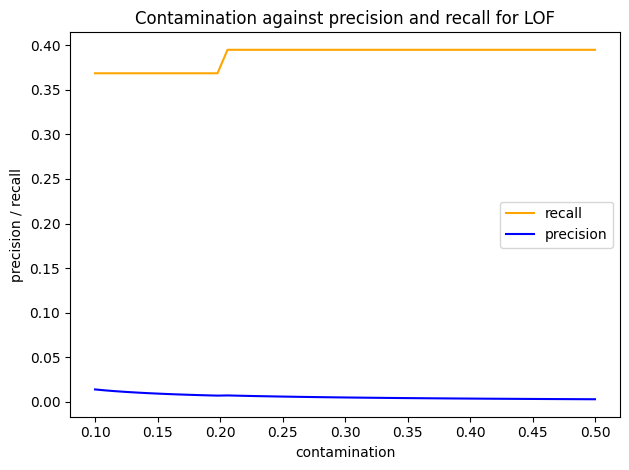

In [14]:
f = plt.figure()
plt.plot(contams, recalls, color = 'orange', label = 'recall')
plt.plot(contams, precisions, color = 'b', label = 'precision')
plt.title('Contamination against precision and recall for LOF')
plt.xlabel('contamination')
plt.ylabel('precision / recall')
plt.legend()
plt.tight_layout()
plt.show()

When the contamination parameter increase, precision decrease and recall increase.

**Question 8:**

Although the valid range of `contamination` parameter is (0.0, 0.5] so we can flag up to half of observations as outliers, it usually doesn't make sense to flag half the observations as outliers, since outliers are very rare.  Based on your answer in question 4 that shows that in this case, the fraudulent transactions are indeed rare, let's check `contimation` only up to 0.1 (we will flag maximum 10% of transactions as fraudulent).
  - Try passing different values to the parameter `contamination` of LocalOutlierFactor in range (0.0, 0.1].
  - Plot the `contamination` parameter on the X axis and both `precision` and `recall` on the Y axis of the same graph.
  - Plot on the same graph a vertical line for contamination (% of transactions flagged as fraudulent) that was found by LocalOutlierFactor with default parameters (question 5).
  - Would you say that the `contamination` chosen by default is a good choice?
  - If you would go with a higher `contamination` value, what value would you choose and why?
  - If you would go with a lower `contamination` value, what value would you choose and why?

In [15]:
# your code here
contams_bis = np.linspace(0.01,0.1,50).round(4)
precisions_bis = []
recalls_bis = []
for contam in contams_bis:
  lof3 = LocalOutlierFactor(contamination = contam)
  y_pred_contam = lof3.fit_predict(X)
  y_pred_contam[y_pred_contam == 1] = 0
  y_pred_contam[y_pred_contam == -1] = 1
  precision = precision_score(y,y_pred_contam)
  recall = recall_score(y,y_pred_contam)
  precisions_bis.append(precision)
  recalls_bis.append(recall)

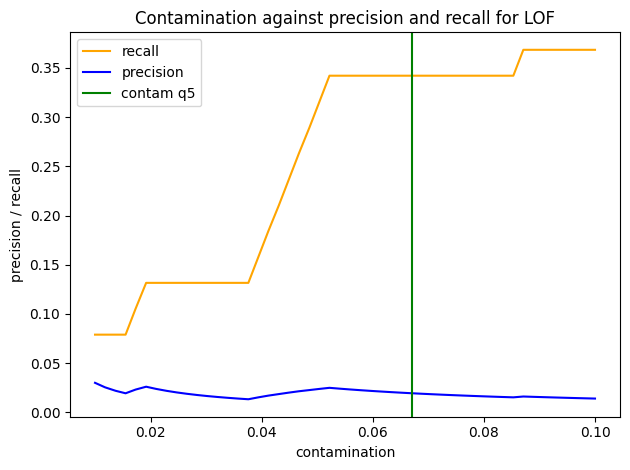

In [16]:
f = plt.figure()
plt.plot(contams_bis, recalls_bis, color = 'orange', label = 'recall')
plt.plot(contams_bis, precisions_bis, color = 'b', label = 'precision')
plt.title('Contamination against precision and recall for LOF')
plt.xlabel('contamination')
plt.ylabel('precision / recall')
plt.axvline(0.067, color = 'green', label = 'contam q5')
plt.legend()
plt.tight_layout()
plt.show()

The contamination chosen by default gives a recall around 0.32 and a contamination around 0.02. We see that for the same level of recall, we can have a higher precision by taking a contamination around 0.05
so I would go for a contamination of 0.05

**Question 9:** Repeat questions 5-8 using `sklearn.ensemble.IsolationForest`.

#### Q5

In [17]:
# your code here
from sklearn.ensemble import IsolationForest
isof = IsolationForest()
y_pred_isof_def = isof.fit_predict(X)


In [18]:
unique_val, occ_val = np.unique(y_pred_isof_def,return_counts = True)

In [19]:
occ_val/X.shape[0]*100

array([ 4.63, 95.37])

By default, 425 transactions (=4.25%)  are labeled as fraudulent.

#### Q6

In [20]:
y_pred_isof_def[y_pred_isof_def == 1] = 0
y_pred_isof_def[y_pred_isof_def == -1] = 1
print(confusion_matrix(y,y_pred_isof_def))
print(classification_report(y,y_pred_isof_def))

[[9535  427]
 [   2   36]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9962
           1       0.08      0.95      0.14        38

    accuracy                           0.96     10000
   macro avg       0.54      0.95      0.56     10000
weighted avg       1.00      0.96      0.97     10000



In [21]:
indexes_isof = random.sample(range(1000),425)
y_pred_random_if = np.zeros(10000, dtype = int)
y_pred_random_if[indexes_isof] = 1
print(confusion_matrix(y,y_pred_random_if))
print(classification_report(y,y_pred_random_if))

[[9538  424]
 [  37    1]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9962
           1       0.00      0.03      0.00        38

    accuracy                           0.95     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.99      0.95      0.97     10000



With default parameters, isolationforest caught 95% of fraudulent transactions whereas with a random selection, it caught only 5% of fraudulent transactions.

#### Q7

In [22]:
import warnings
warnings.filterwarnings('ignore')

contam_if = np.linspace(0.01,0.5,50)
recalls_if = []
precisions_if = []
for contam in contam_if:
  isof = IsolationForest(contamination = contam)
  y_pred_isof = isof.fit_predict(X)
  y_pred_isof[y_pred_isof == 1] = 0
  y_pred_isof[y_pred_isof == -1] = 1
  precision = precision_score(y,y_pred_isof)
  recall = recall_score(y,y_pred_isof)
  recalls_if.append(recall)
  precisions_if.append(precision)



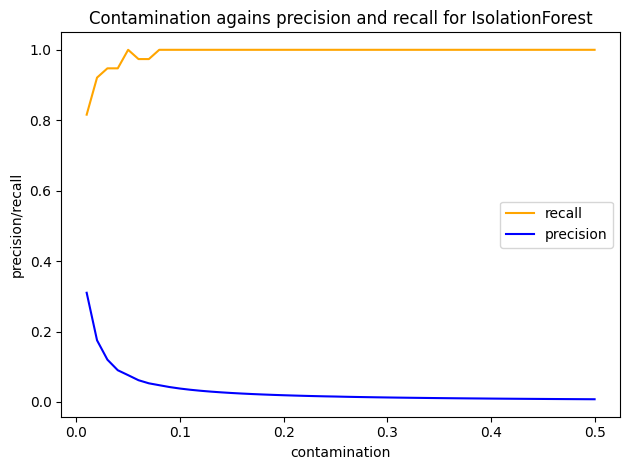

In [23]:
f = plt.figure()
plt.plot(contam_if,recalls_if,label = 'recall', color = 'orange')
plt.plot(contam_if,precisions_if,label = 'precision', color = 'blue')
plt.title('Contamination agains precision and recall for IsolationForest')
plt.xlabel('contamination')
plt.ylabel('precision/recall')
plt.legend()
plt.tight_layout()
plt.show()

When the contamination increases, precision decrease and recall increase. For contamination >= 0.05, recall is stationary.

#### Q8

In [24]:
new_contam_if = np.linspace(0.01,0.1,50)
recalls_if_new = []
precisions_if_new = []
for contam in new_contam_if:
  isof = IsolationForest(contamination = contam)
  y_pred_isof = isof.fit_predict(X)
  y_pred_isof[y_pred_isof == 1] = 0
  y_pred_isof[y_pred_isof == -1] = 1
  precision = precision_score(y,y_pred_isof)
  recall = recall_score(y,y_pred_isof)
  recalls_if_new.append(recall)
  precisions_if_new.append(precision)

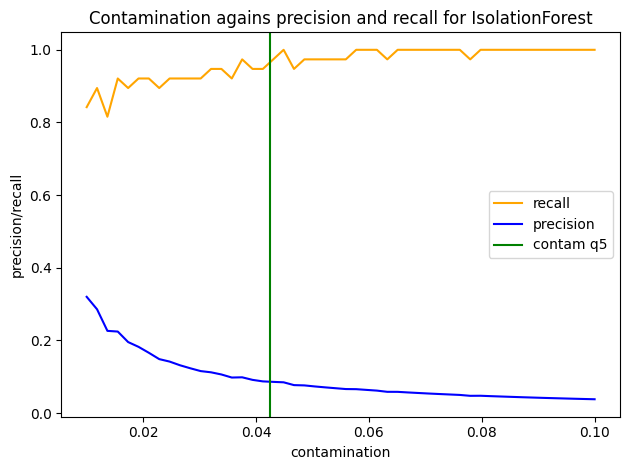

In [25]:
f = plt.figure()
plt.plot(new_contam_if,recalls_if_new,label = 'recall', color = 'orange')
plt.plot(new_contam_if,precisions_if_new,label = 'precision', color = 'blue')
plt.axvline(0.0425, color = 'green', label = 'contam q5')
plt.title('Contamination agains precision and recall for IsolationForest')
plt.xlabel('contamination')
plt.ylabel('precision/recall')
plt.legend()
plt.tight_layout()
plt.show()

We see that for the same level of recall, we can have a higher precision so I would choose a contamination around 0.04 to keep a high level of recall but with a higher level of precision than the one choosen by default.

**Question 10:**
- Plot contamination, precision and recall both for LOF and IF on the same graph for contaminations in range (0, 0.1].  **Tip:** use different colors for precision and recall, and different line styles to differentiate between LOF and IF.
- What algorithm gives us consistently better results?
- What algorithm and what contamination value would you choose and why? If you are not sure, give a few options.

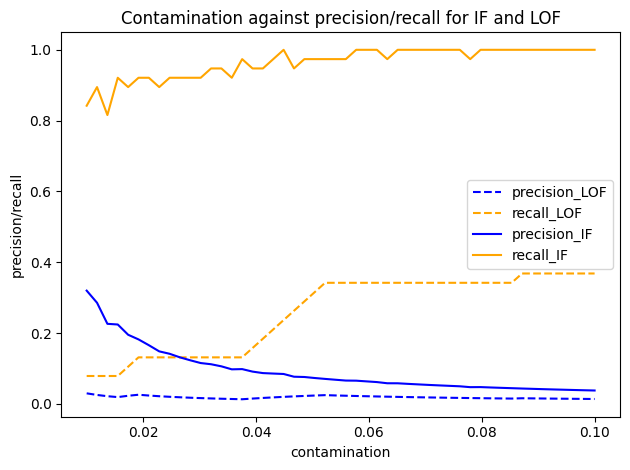

In [26]:
# your code here
f = plt.figure()
##LOF
plt.plot(new_contam_if,precisions_bis, color = 'blue', linestyle = '--', label = 'precision_LOF')
plt.plot(new_contam_if,recalls_bis, color = 'orange', linestyle = '--', label = 'recall_LOF')
## IF
plt.plot(new_contam_if,precisions_if_new, color = 'blue', linestyle = '-', label = 'precision_IF')
plt.plot(new_contam_if,recalls_if_new,color = 'orange', linestyle = '-', label = 'recall_IF')

plt.title('Contamination against precision/recall for IF and LOF')
plt.xlabel('contamination')
plt.ylabel('precision/recall')

plt.legend()
plt.tight_layout()
plt.show()

Isolation Forest algorithm gives us much better result than Local Outlier Factor. We get a higher recall and a higher precision for each level of contamination.

Then, I would choose the Isolation Forest algorithm and a contamination around 0.04 to get a very high level of recall but also a decent level of precision.